# Basic Tutorial: Embedded graph class 

In this notebook, we'll walk through the basic functionality of the `EmbeddedGraph` class. See [here](../modules/reeb/embedgraph.rst)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# The main class for the embedded graph
from cereeberus import EmbeddedGraph

## Constructing the embedded graph

We assume our input is an undirected graph $G$ with an embedding in 2D given by a map on the vertices $f: V(G) \to \mathbb{R}^2$. A graph can be constructed as follows. 


<Axes: >

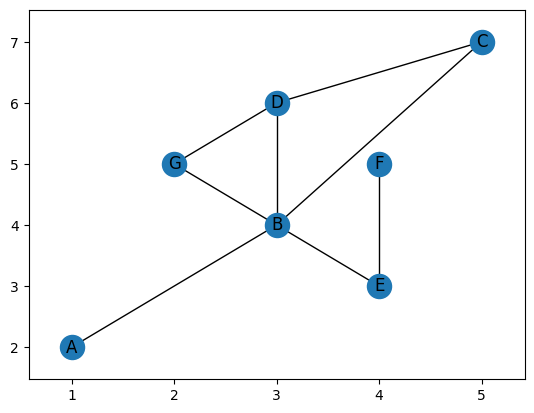

In [10]:
# Construct an example graph 

G = EmbeddedGraph()

G.add_node('A', 1, 2)
G.add_node('B', 3, 4)
G.add_node('C', 5, 7)
G.add_node('D', 3, 6)
G.add_node('E', 4, 3)
G.add_node('F', 4, 5)
G.add_node('G', 2, 5)

G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('C', 'D')
G.add_edge('E', 'F')
G.add_edge('G', 'D')
G.add_edge('G', 'B')

G.plot()


The coordinates of all vertices, given as a dictionary, can be accessed using the `coordinates` attribute.

In [11]:
G.coordinates

{'A': (1, 2),
 'B': (3, 4),
 'C': (5, 7),
 'D': (3, 6),
 'E': (4, 3),
 'F': (4, 5),
 'G': (2, 5)}

Because of the rotational aspect of the ECT, we often want our graph to be centered, so you can use the `set_mean_centered_coordinates` method shift the graph to have the average of the vertex coordinates be 0. Note that this does overwrite the coordinates of the points. 

{'A': (-2.142857142857143, -2.571428571428571), 'B': (-0.1428571428571428, -0.5714285714285712), 'C': (1.8571428571428572, 2.428571428571429), 'D': (-0.1428571428571428, 1.4285714285714288), 'E': (0.8571428571428572, -1.5714285714285712), 'F': (0.8571428571428572, 0.4285714285714288), 'G': (-1.1428571428571428, 0.4285714285714288)}


<Axes: >

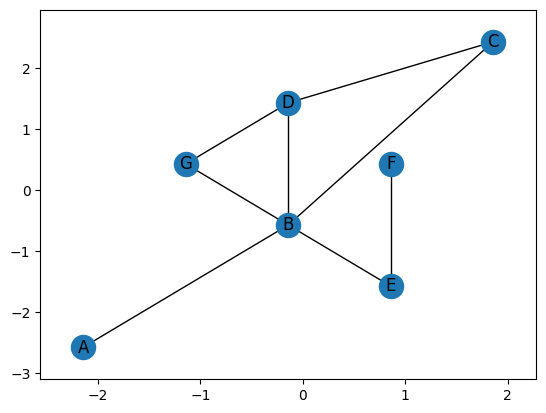

In [12]:
G.set_mean_centered_coordinates()
print(G.coordinates)
G.plot()

## Reeb graph from a given direction

Directions are given in the code by specifying $\theta \in [0,2\pi]$. We often convert this to $\omega \in \mathbb{S}^1$ by defining the unit vector $\omega = (\cos(\theta), \sin(\theta))$. Then the function $g_\omega$ is defined on the vertices of $G$ by taking the dot product of the embedding coordinates with the unit vector, specifically
$$
g_\omega(v) = \langle f(v), \omega\rangle.
$$
This is done in the code using the `g_omega` method as shown. 

<Axes: >

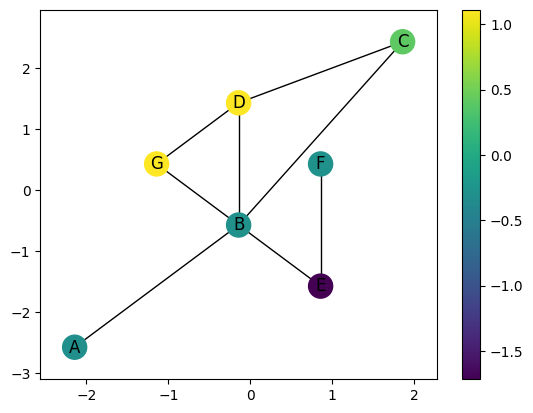

In [13]:
G.plot(color_nodes_theta=3*np.pi/4)

For this function defined based on the direction, we can then construct the Reeb graph of the graph with the function. Note that the drawing locations no longer have anything to do with the original embedding information other than have the $y$-coordinate the same as the function value. 

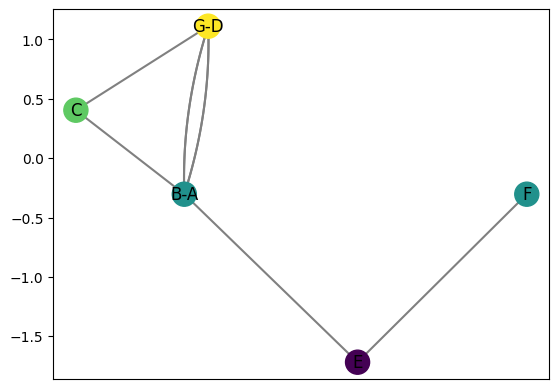

In [16]:
R = G.reeb_graph_from_direction(3*np.pi/4)
R.draw(cpx = .2)

Of course, collapsing of two vertices only happens at degenerate directions (i.e. those where the endpoints of an edge have the same function value in that direction). For most directions, the Reeb graph will look similar to the original graph, but the only information retained is now a 1-d function. 

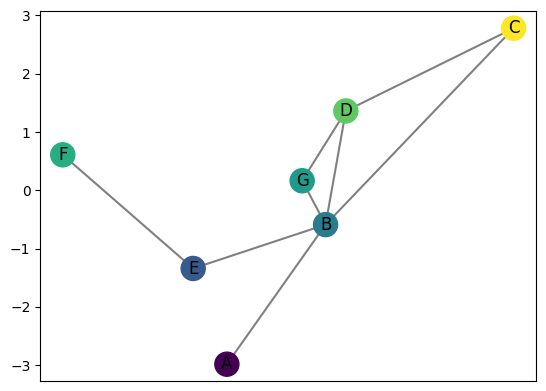

In [19]:
R = G.reeb_graph_from_direction(3*np.pi/7)
R.draw(cpx = .2)